In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2, t

In [2]:
ALPHA = 0.05

N = 50
MU = 10
SIGMA = 2

np.random.seed(111)
YSample = norm.rvs(10, 2, size=N)

---

In [3]:
def RelativeLogLikelihood(mu, sigma, data):
    n = len(data)
    sigma_hat = np.std(data)

    return n * (np.log(sigma_hat / sigma) + 0.5 * (1 - (np.mean(data**2) - 2 * mu * np.mean(data) + mu**2) / sigma**2))

def RelativeLikelihood(mu, sigma, data):
    return np.exp(RelativeLogLikelihood(mu, sigma, data))

---

In [4]:
# Calculate the MLE of mu and sigma
Mu_MLE = np.mean(YSample)
Sigma_MLE = np.std(YSample)

In [5]:
# Find confidence intervals for mu and sigma
S = np.std(YSample, ddof=1)

LowMu, UppMu = t.ppf(ALPHA/2, N-1, Mu_MLE, S/np.sqrt(N)), t.ppf(1 - ALPHA/2, N-1, Mu_MLE, S/np.sqrt(N))
LowSigma, UppSigma =  S * np.sqrt(N-1) / np.sqrt(chi2.ppf(1-ALPHA/2, N-1)), S * np.sqrt(N-1) / np.sqrt(chi2.ppf(ALPHA/2, N-1))

# Find prediction interval for Y
LowY, UppY = t.ppf(ALPHA/2, N-1, Mu_MLE, np.sqrt(S**2/N + S**2)), t.ppf(1 - ALPHA/2, N-1, Mu_MLE, np.sqrt(S**2/N + S**2))

In [6]:
Probabilities = np.array([0.1, 0.5, 0.75, 0.89, 0.95])
Probabilities = Probabilities[::-1] # We need to write the probabilities in a dicreasing order

Levels = np.exp(-0.5 * chi2.ppf(Probabilities, 2))

In [7]:
mu_vect = np.linspace(9.05, 10.9, 100)
sigma_vect = np.linspace(1.5, 2.6, 100)

mu_grid, sigma_grid = np.meshgrid(mu_vect, sigma_vect)

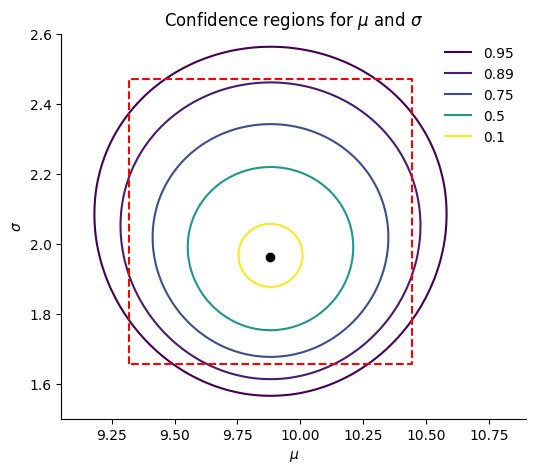

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))

cnt = ax.contour(mu_grid, sigma_grid, RelativeLikelihood(mu_grid, sigma_grid, YSample), Levels)
ax.scatter(x=Mu_MLE, y=Sigma_MLE, color='k')

ax.plot([LowMu, LowMu, UppMu, UppMu, LowMu], [LowSigma, UppSigma, UppSigma, LowSigma, LowSigma], color='r', ls='--')

ax.set_title(r"Confidence regions for $\mu$ and $\sigma$")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\sigma$")

_, labels = cnt.legend_elements()
ax.legend(_, Probabilities, loc="upper right", frameon=False)

ax.spines[['right', 'top']].set_visible(False)

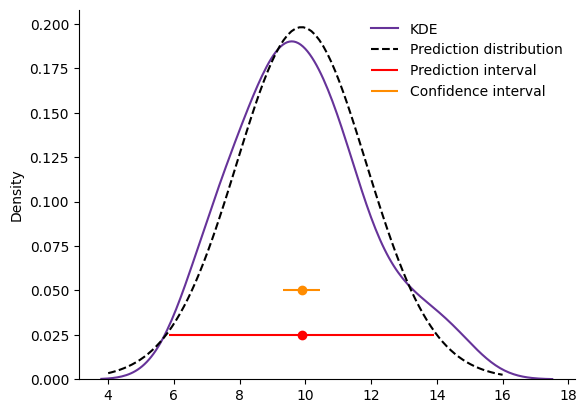

In [9]:
y_vect = np.linspace(4, 16, 100)

ax = sns.kdeplot(YSample, color="rebeccapurple", label="KDE")
ax.plot(y_vect, t.pdf(y_vect, N-1, Mu_MLE, np.sqrt(S**2/N + S**2)), color="k", ls="--",  label="Prediction distribution")

ax.hlines(0.025, LowY, UppY, color='red', label="Prediction interval")
ax.hlines(0.05, LowMu, UppMu, color='darkorange', label="Confidence interval")
ax.scatter(Mu_MLE, 0.025, color='red')
ax.scatter(Mu_MLE, 0.05, color='darkorange')

ax.legend(frameon=False)
ax.spines[['right', 'top']].set_visible(False)